# Case Study on Correlation and Regression

A textile company regularly spent money on five advertising companies for their 
ads. (Dataset added along with)
1. First of all, check whether there is any relationship between the amount 
spent for advertising through five different companies and profit 
generated.
2. Build a regression model to predict the profit from the given data and 
comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the 
following amount for advertisement

        1. Import the libraries and load dataset from the file given.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
Dataset=pd.read_csv('C:\python learning\Add_sales_data_2018.csv')

In [18]:
Dataset

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


    The above shows dataset read from csv file.The file contains 205rows X 7 columns

In [31]:
Dataset.shape

(205, 7)

In [19]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [32]:
Dataset.dtypes

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

# Check if the dataset contain null values

In [20]:
Dataset.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

     Its clear that dataset doesn't contain any null value

# First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [102]:
Dataset1=Dataset.rename(columns={'Add1(in Thousands)':'Add1','Add2(in Thousands)':'Add2','Add3(in Thousands)':'Add3','Add4(in Thousands)':'Add4','Add5(in Thousands)':'Add5','Profit(in Thousands)':'Profit'})


In [103]:
N= Dataset1[['Add1','Add2','Add3','Add4','Add5','Profit']]
N.describe()

,Add1,Add2,Add3,Add4,Add5,Profit
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


          statistical details of the dataset, we'll use the describe()

In [104]:
correlations=N.corr()
correlations

,Add1,Add2,Add3,Add4,Add5,Profit
Add1,1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2,0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3,0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4,0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5,0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit,0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

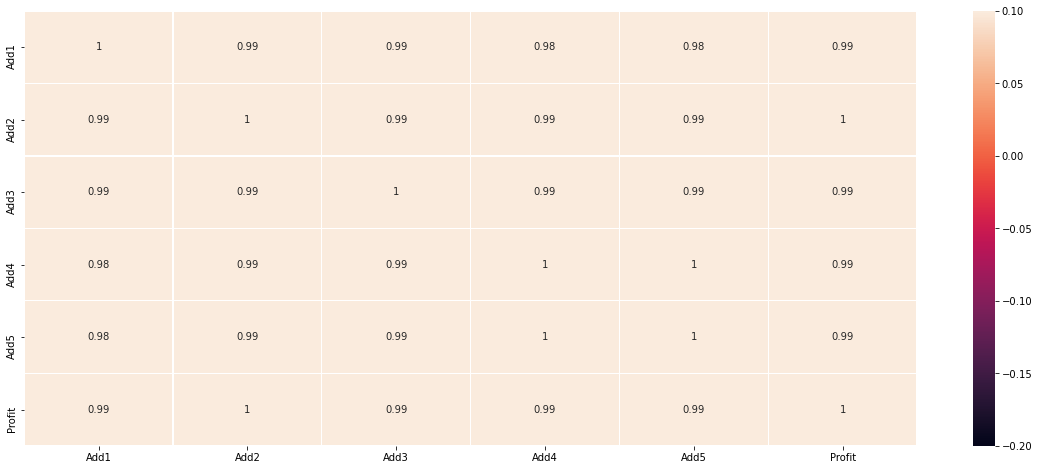

In [105]:
plt.subplots(figsize=(20,8))
sns.heatmap(correlations,vmin=-.2,vmax=.1,annot=True,linewidth=0.3)

# Build a regression model to predict the profit from the given data and comment your findings on it

In [106]:
x = N[['Add1', 'Add2', 'Add3','Add4','Add5']]
y = N['Profit']

      Preparing the Data
      Use column names for creating an attribute set and label.

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

      Divide our data into training and test sets

In [108]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

           To train the algorithm use the fit() method of the LinearRegression class

In [110]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Add1,1.00
Add2,12.38
Add3,3.50
Add4,1.00
Add5,0.90


    Add2 has high profit and Add5 has least profit

In [111]:
regressor.score(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred


array([4494.144, 5921.116, 4404.686, 4190.965, 5880.541, 5728.804,
       5225.14 , 5017.503, 5518.561, 4513.6  , 4464.11 , 5140.372,
       4760.877, 5038.222, 4606.34 , 5730.999, 4922.845, 4470.775,
       4480.363, 5065.652, 5043.705, 5491.792, 4968.03 , 5792.175,
       6137.8  , 5247.011, 5137.534, 5373.275, 5212.949, 4898.776,
       5972.337, 5745.806, 5153.977, 5805.521, 4763.69 , 4175.677,
       5938.474, 4915.682, 4523.704, 5113.337, 4648.627])

In [112]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
52,4494.144,4494.144
181,5921.116,5921.116
5,4404.686,4404.686
18,4190.965,4190.965
188,5880.541,5880.541
170,5728.804,5728.804
76,5225.140,5225.140
154,5017.503,5017.503
104,5518.561,5518.561
33,4513.600,4513.600


      To compare the actual output values for x_test with the predicted values

In [82]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1978710706277592e-12
Mean Squared Error: 1.8157623202383536e-24
Root Mean Squared Error: 1.3475022524056698e-12


# Predict the profit generated by the company, if they wish to spend the following amount for advertisement

In [100]:
x = N[['Add1', 'Add2', 'Add3','Add4','Add5']]
y = N['Profit']
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [101]:
ypred = regressor.predict(x)
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})
print(data.head())

   Predicted Profit
0          4093.065
1          4042.448
2          4213.819
3          4391.665
4          4350.683
